In [ ]:
############  PCA ##########

In [1]:
#Import Libraries
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns
import os

In [2]:
#Read dataset
TrainingSetdf = pd.read_csv("BATADAL_dataset03.csv", parse_dates=True, index_col='DATETIME', dayfirst=True)
EvalSetdf=pd.read_csv("BATADAL_dataset04.csv", parse_dates=True, index_col='DATETIME', dayfirst=True)

In [3]:
#Remove labels
del TrainingSetdf['ATT_FLAG']
TrainingSetdf.shape

(8761, 43)

In [4]:
#Normalize trainset
normalize = StandardScaler()
normalized_training_set = normalize.fit_transform(TrainingSetdf)
print (normalized_training_set)
print (normalized_training_set.shape)

[[-1.80166786 -0.84216105 -1.4897346  ... -0.14960353 -1.03212449
  -0.36335486]
 [-1.88243244 -0.8693521  -0.82434137 ... -0.13962538 -1.03997205
  -0.37585097]
 [-1.95930569 -0.88499958 -0.09084088 ...  0.84640594 -1.03990535
  -0.37574476]
 ...
 [ 0.36394528  0.45105891 -1.58995051 ... -0.2674142  -0.58470987
   0.34908874]
 [ 0.21173951  0.41325741 -0.97116869 ... -0.20251108 -0.60133195
   0.32262046]
 [ 0.05827056  0.36958123 -0.32060645 ...  0.12189842 -0.60166048
   0.32209734]]
(8761, 43)


In [5]:
#Fit PCA to trainset
pca = decomposition.PCA(n_components=TrainingSetdf.shape[1])
pca.fit(normalized_training_set)
pca_model = pca.transform(normalized_training_set)
pca_model.shape

(8761, 43)

In [6]:
#Explained variance captured
print (np.sort(pca.explained_variance_)[::-1])


[7.73880163e+00 4.81738519e+00 4.60975503e+00 3.59198956e+00
 2.59716191e+00 2.43398357e+00 1.99933262e+00 1.99388799e+00
 1.53114630e+00 1.16955790e+00 9.23926257e-01 8.84997095e-01
 6.71067185e-01 5.43107776e-01 2.63363186e-01 1.04771232e-01
 3.93624696e-02 2.83612156e-02 2.38967620e-02 1.46386292e-02
 9.12329242e-03 7.42142144e-03 2.42577247e-03 1.91759825e-03
 1.01347477e-03 5.44403134e-04 3.05990281e-04 2.96699289e-04
 1.98771459e-04 1.95000329e-04 1.12080398e-04 6.04850875e-05
 1.04826089e-06 2.35440453e-08 8.64833616e-10 2.50102493e-10
 1.78612174e-31 3.58627499e-32 3.58627499e-32 3.58627499e-32
 3.58627499e-32 3.58627499e-32 3.17461208e-32]


In [7]:
#Cummulative variance captured
cummulative_variance=cummulative_variance=pca.explained_variance_ratio_.cumsum()
print(cummulative_variance)

[0.21494218 0.34874316 0.47677729 0.57654339 0.64867854 0.71628148
 0.77181216 0.82719161 0.8697186  0.90220261 0.9278643  0.95244475
 0.97108338 0.98616798 0.99348279 0.99639277 0.99748605 0.99827377
 0.99893749 0.99934407 0.99959747 0.9998036  0.99987097 0.99992423
 0.99995238 0.9999675  0.999976   0.99998424 0.99998976 0.99999518
 0.99999829 0.99999997 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.        ]


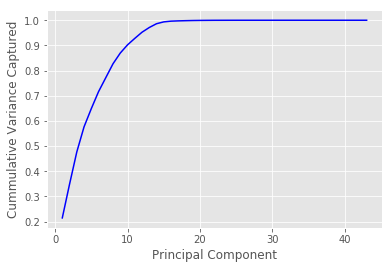

In [8]:
#Cummulative Variance Captured plot
x_axis = np.arange(1, TrainingSetdf.shape[1]+1, 1)
plt.xlabel('Principal Component')
plt.ylabel('Cummulative Variance Captured')
plt.plot(x_axis, cummulative_variance,"blue")

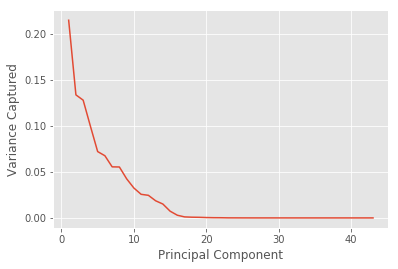

In [9]:
#Variance Captured plot
x_axis = np.arange(1, TrainingSetdf.shape[1]+1, 1)
plt.xlabel('Principal Component')
plt.ylabel('Variance Captured')
plt.plot(x_axis, pca.explained_variance_ratio_)

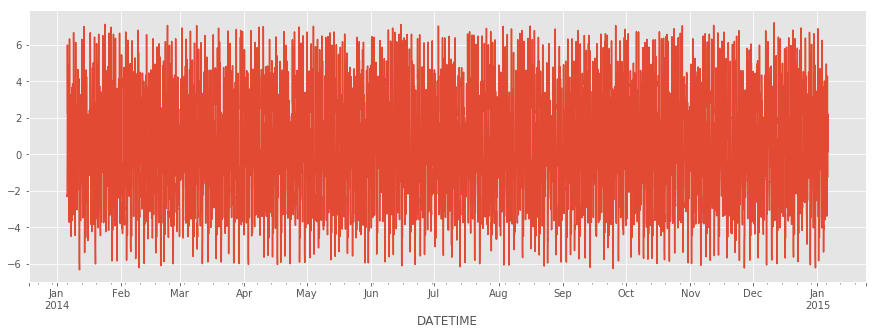

In [10]:
#Projection on first PC
TrainingSetdf = TrainingSetdf.assign(PC1=pca_model[:,0])
TrainingSetdf['PC1'].plot(figsize=(15,5))

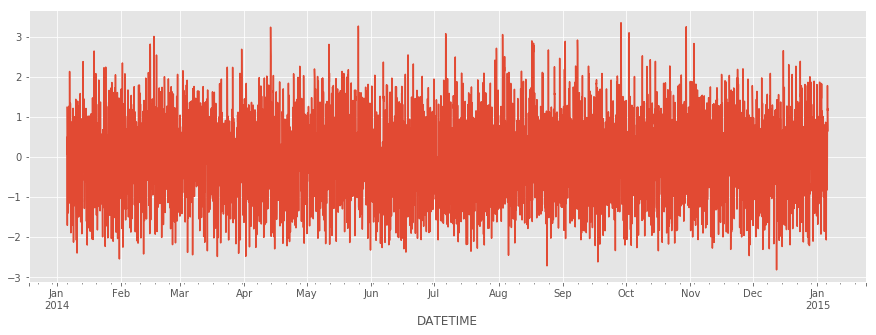

In [11]:
#Projection on 10th PC
TrainingSetdf = TrainingSetdf.assign(PC2=pca_model[:,10])
TrainingSetdf['PC2'].plot(figsize=(15,5))

In [12]:
# After subspace selection, we use use top 11 principal components for modeling normal subspace 
# and next 4 components for modelling anomalous subspace
pca = decomposition.PCA(n_components=15)
pca.fit(normalized_training_set)
pca_model = pca.transform(normalized_training_set)

In [13]:
##Cummulative variance captured
pca.explained_variance_ratio_.cumsum()

array([0.21494218, 0.34874316, 0.47677729, 0.57654339, 0.64867854,
       0.71628148, 0.77181216, 0.82719161, 0.8697186 , 0.90220261,
       0.9278643 , 0.95244475, 0.97108338, 0.98616798, 0.99348279])

In [14]:
#Keep test labels
labels = np.array(EvalSetdf[' ATT_FLAG'].tolist())
i=0
for el in labels:
    if el==1:
        i+=1
print(i)

219


In [15]:
#Remove test labels
del EvalSetdf[' ATT_FLAG']
EvalSetdf

,L_T1,L_T2,L_T3,L_T4,L_T5,L_T6,L_T7,F_PU1,S_PU1,F_PU2,...,P_J300,P_J256,P_J289,P_J415,P_J302,P_J306,P_J307,P_J317,P_J14,P_J422
DATETIME,,,,,,,,,,,,,,,,,,,,,
2016-07-04 00:00:00,2.44,5.24,3.19,4.10,2.86,5.50,4.39,93.63,1.0,93.65,...,28.26,70.00,28.22,85.87,21.69,82.72,21.58,71.99,39.33,29.64
2016-07-04 01:00:00,2.66,4.53,3.20,4.18,3.29,5.44,4.53,89.41,1.0,89.43,...,24.39,87.73,24.45,84.87,29.81,86.62,29.81,59.76,42.17,26.15
2016-07-04 02:00:00,3.11,3.66,3.66,4.21,3.87,5.15,3.22,89.88,1.0,89.89,...,23.84,89.29,23.90,87.11,29.85,87.64,29.85,58.50,42.00,25.56
2016-07-04 03:00:00,3.62,3.04,4.17,4.04,3.56,4.98,2.40,88.10,1.0,88.12,...,27.00,91.98,27.10,68.75,31.60,64.25,31.47,72.30,43.24,28.38
2016-07-04 04:00:00,4.08,2.68,4.73,3.20,3.11,5.39,3.46,87.01,1.0,87.03,...,26.67,92.11,26.76,68.74,32.30,64.23,32.17,72.53,44.00,28.04
2016-07-04 05:00:00,4.53,2.10,5.26,3.29,2.76,5.50,4.67,110.09,1.0,0.00,...,22.59,91.94,22.64,86.26,30.41,63.36,30.30,79.47,39.76,24.28
2016-07-04 06:00:00,4.84,1.57,5.12,3.90,2.29,5.30,3.90,107.71,1.0,0.00,...,24.78,75.29,24.74,87.03,33.98,63.13,33.98,59.47,41.24,26.13
2016-07-04 07:00:00,5.19,1.07,4.85,4.45,1.87,5.00,2.66,110.23,1.0,0.00,...,24.25,73.65,24.22,85.95,33.22,61.75,33.22,55.73,40.05,25.61
2016-07-04 08:00:00,5.22,0.94,4.52,3.51,1.55,5.09,2.48,111.38,1.0,0.00,...,25.94,71.43,25.94,57.78,22.73,81.09,22.61,67.51,39.26,27.13


In [16]:
#Normalize test set
normalized_test_set = normalize.fit_transform(EvalSetdf)
pca_test = pca.transform(normalized_test_set)

In [17]:
#Find residuals
eigenvectors = pca.components_
P = np.transpose(eigenvectors[:-5])
P_T = np.transpose(P)
C = np.dot(P, P_T)
I = np.identity(EvalSetdf.shape[1])

# y_residual corresponds to the projection of test data on anomalous subspace
y_residual = np.zeros((normalized_test_set.shape))

# Find projection of test data on anomalous subspace
for i in range(normalized_test_set.shape[0]):
    y = np.transpose(normalized_test_set[i])
    y_residual[i] = np.dot(I - C, y)  

In [18]:
#Calculate SPE for each residual
DateOfAnomalyPCA=[]
spe = np.zeros((normalized_test_set.shape[0]))
attack = np.ones((normalized_test_set.shape[0]))
threshold = 300
for i in range(normalized_test_set.shape[0]):
    spe[i] = np.square(np.sum(np.subtract(y_residual[i], normalized_test_set[i])))     
    if(spe[i] > threshold):
        attack[i] = 1
        date = EvalSetdf.index[i].strftime("%Y-%m-%d %H:%M:%S")
        
        if date not in DateOfAnomalyPCA:
            DateOfAnomalyPCA.append(i)
        
    else:
        attack[i]=-999


In [19]:
thres=[]
for i in range(spe.shape[0]):
    thres.append(threshold)  

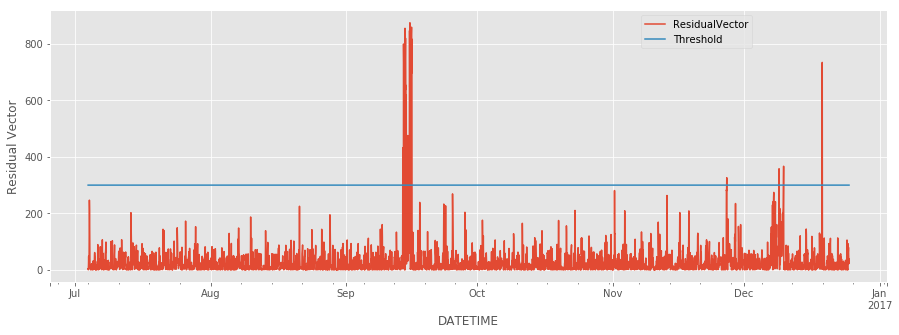

In [20]:
#Residuals Plot
EvalSetdf = EvalSetdf.assign(ResidualVector=spe)
EvalSetdf = EvalSetdf.assign(Threshold=thres)
EvalSetdf['ResidualVector'].plot(figsize=(15,5),label="ResidualVector")
EvalSetdf['Threshold'].plot(figsize=(15,5), label="Threshold")
plt.legend(bbox_to_anchor=(0.7, 1), loc=2)
plt.xlabel("DATETIME")
plt.ylabel("Residual Vector")
plt.show()

In [21]:
#Calculate Metrics
from sklearn.metrics import confusion_matrix
tn,fp,fn,tp=confusion_matrix(labels, attack).ravel()

In [22]:
print ("TP:", tp)
print ("FP:", fp)
print ("FN:", fn)
print ("TN:", tn)

TP: 22
FP: 10
FN: 197
TN: 3948


In [23]:
Accuracy=(tp+tn)/(tp+tn+fp+fn)*100
Precision=tp / (tp + fp)*100
Recall = tp / (tp + fn)*100
F_score = 2*tp /(2*tp + fp + fn)*100
print("Accuracy:","%.2f" % Accuracy)
print("Precision:","%.2f" % Precision)
print("Recall:", "%.2f" %Recall)
print("F_score:","%.2f" % F_score)

Accuracy: 95.04
Precision: 68.75
Recall: 10.05
F_score: 17.53


In [24]:
import pickle

with open('PCADates.pickle', 'wb') as handle:
    pickle.dump(DateOfAnomalyPCA, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('PCADates.pickle', 'rb') as handle:
    b = pickle.load(handle)

print(DateOfAnomalyPCA == b)

True
